# Objective:- 

- ## Imporve customer exprience by analyzing sales data.
- ## Increase revenue

In [69]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualizing data 
%matplotlib inline
import seaborn as sns

In [70]:
## Import data
df = pd.read_csv('Diwali Sales Data.csv', encoding='ISO-8859-1')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [71]:
df.shape

(11251, 15)

## Data Cleaning 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [73]:
# Drop unrelated/blank columns: 
df.drop(['Status', 'unnamed1'],axis = 1,inplace = True)

In [74]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [75]:
# Check null values 
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [76]:
# Drop null values
df.dropna(inplace = True)

In [77]:
df.shape

(11239, 13)

In [78]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [80]:
# data type of columns 
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [81]:
# Change data type 
df['Amount'] = df['Amount'].astype(int)

In [82]:
df['Amount'].dtypes

dtype('int32')

In [83]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [84]:
# using describe() for specific columns
df[['Age', 'Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


 # Exploratory Data Analysis

- ## Gender 

In [85]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

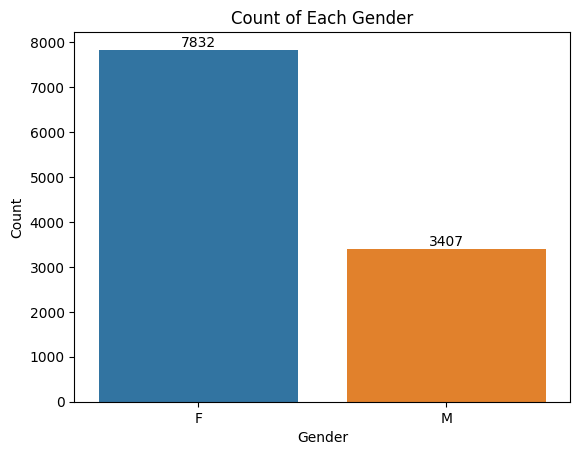

In [86]:
# Create a countplot using Seaborn
ax = sns.countplot(x='Gender', data=df)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Count of Each Gender')

# Display the plot
plt.show()

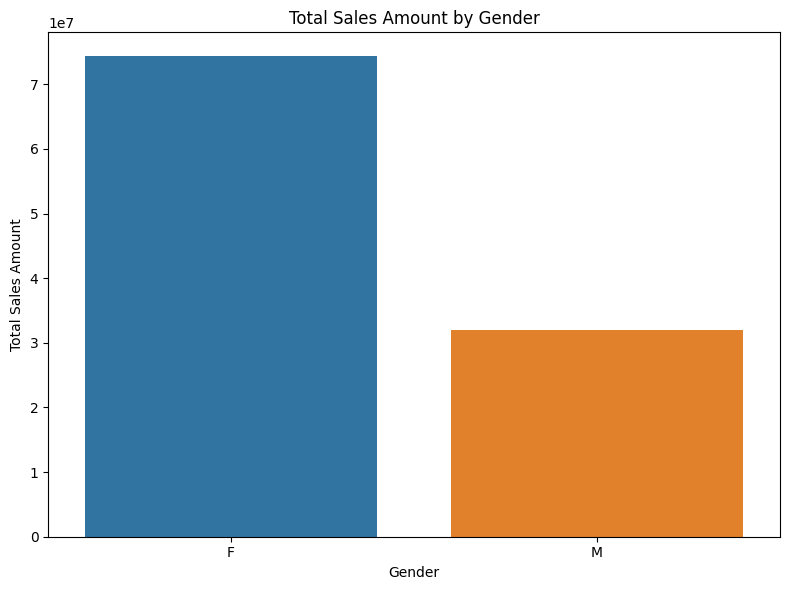

In [87]:
# Calculate total sales amount by gender
sales_gen = df.groupby('Gender')['Amount'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Amount', data=sales_gen)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Gender')

# Display the plot
plt.tight_layout()
plt.show()

### From the above graphs, we can draw the following conclusions:

- The analysis reveals that the majority of buyers are females.
- Interestingly, the purchasing power of females is observed to be greater than that of men.

These insights provide valuable information about the gender-based purchasing behavior within our dataset.


- ## Age

In [89]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

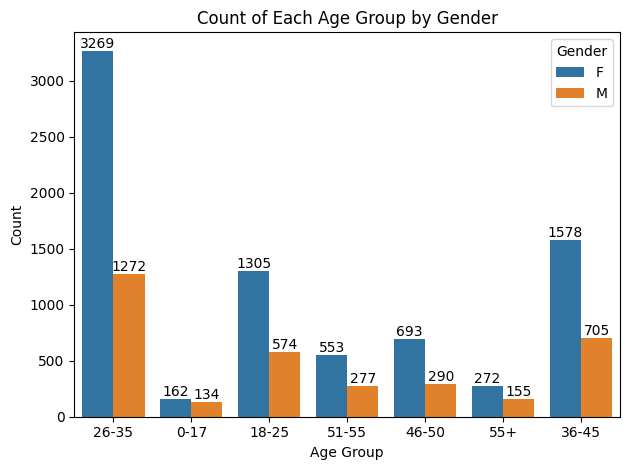

In [92]:
# Create a countplot using Seaborn to visualize Age Group and Gender
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Each Age Group by Gender')

# Display the legend
plt.legend(title='Gender')

# Improve the layout and display the plot
plt.tight_layout()
plt.show()

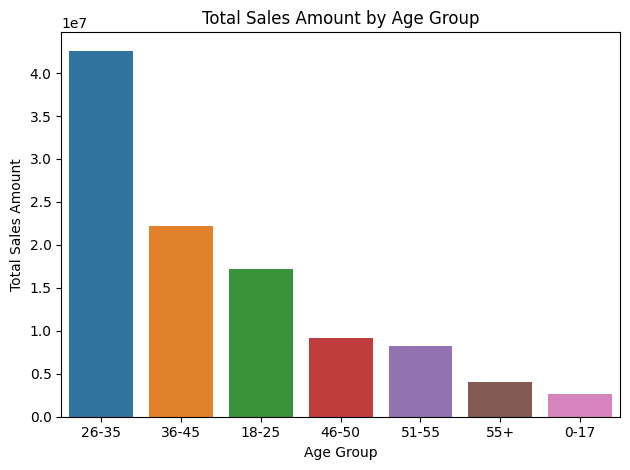

In [109]:
# Calculate total sales amount by age group
sales_age = df.groupby('Age Group')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Create a bar plot using Seaborn
sns.barplot(x='Age Group', y='Amount', data=sales_age)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Age Group')

# Display the plot
plt.tight_layout()
plt.show()

###  From analyzing the graphs, we can see that:

- Most of the buyers are aged between 26 and 35 years old.
- The majority of these buyers are females.

This information gives us valuable insights into the main age group and gender of buyers in our dataset.


- ## State

In [110]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

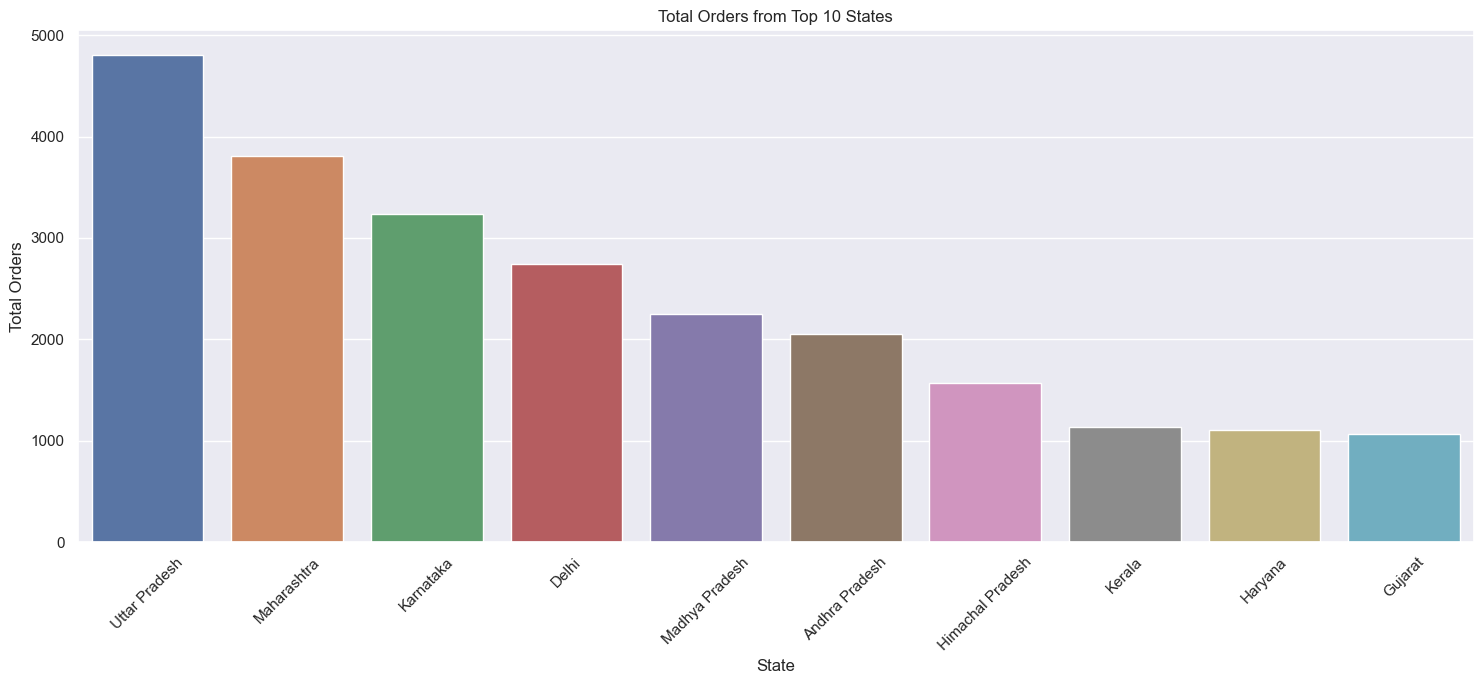

In [115]:
# Calculate the total number of orders from the top 10 states
sales_state = df.groupby(['State'])['Orders'].sum().nlargest(10).reset_index()

# Set the figure size for the plot
plt.figure(figsize=(15, 7))

# Create a bar plot using Seaborn to visualize top 10 states by orders
sns.barplot(data=sales_state, x='State', y='Orders')

# Set labels and title
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.title('Total Orders from Top 10 States')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

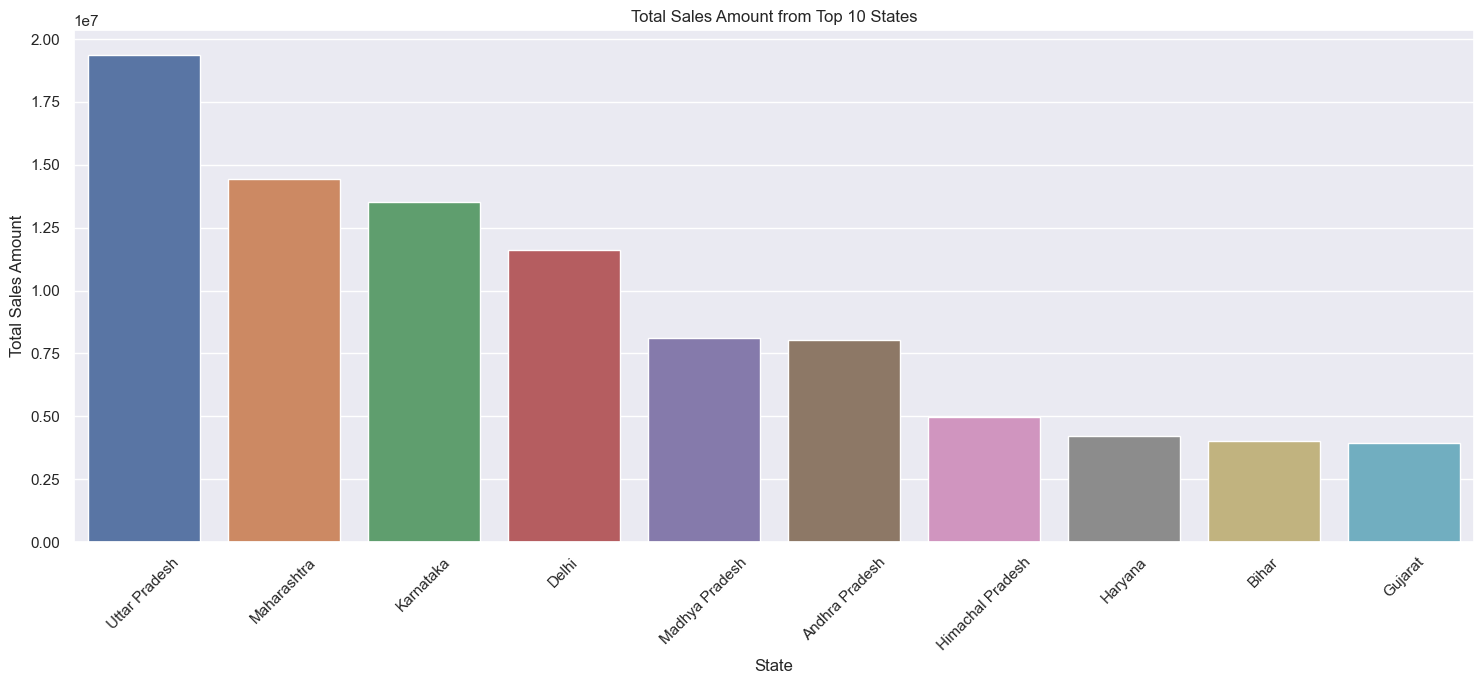

In [118]:
# Calculate the total sales amount from the top 10 states
sales_state = df.groupby(['State'])['Amount'].sum().nlargest(10).reset_index()

# Set the figure size for the plot
plt.figure(figsize=(15, 7))

# Create a bar plot using Seaborn to visualize top 10 states by sales amount
sns.barplot(data=sales_state, x='State', y='Amount')

# Set labels and title
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount from Top 10 States')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### From analyzing the graphs, we can make the following observations:

- Most orders come from Uttar Pradesh, Maharashtra, and Karnataka.
- When it comes to the total sales amount, Maharashtra takes the lead, followed by Uttar Pradesh and Karnataka.

This information gives us a clear picture of the states with the highest order count and top sales figures in our dataset.


- ## Marital Status

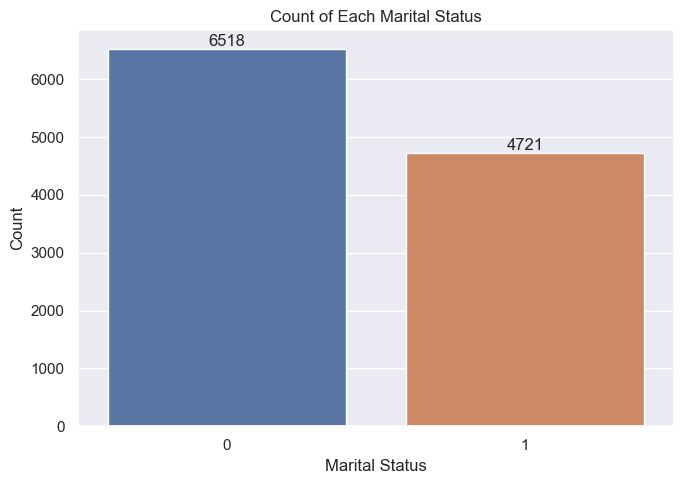

In [120]:
# Set the figure size for the plot
plt.figure(figsize=(7, 5))

# Create a countplot using Seaborn to visualize Marital Status
ax = sns.countplot(data=df, x='Marital_Status')

# Add labels to the bars using bar_label method
ax.bar_label(ax.containers[0])

# Set labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Each Marital Status')

# Display the plot
plt.tight_layout()
plt.show()

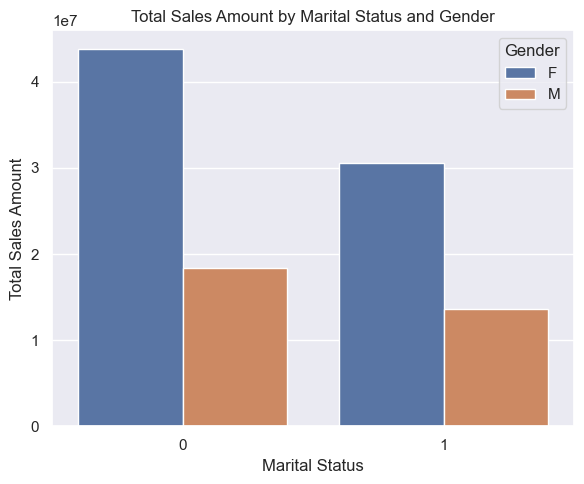

In [125]:
# Calculate total sales amount by Marital Status and Gender
sales_state = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(6, 5))

# Create a bar plot using Seaborn to visualize total sales by Marital Status and Gender
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

# Set labels and title
plt.xlabel('Marital Status')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Marital Status and Gender')

# Display the plot
plt.tight_layout()
plt.show()

### Based on the analysis of the graphs, we can make the following observations:

- The majority of buyers are married women.
- Additionally, these married women show a strong ability to make purchases.

These insights provide valuable information about the purchasing behavior of married women within our dataset.


- ## Occupation

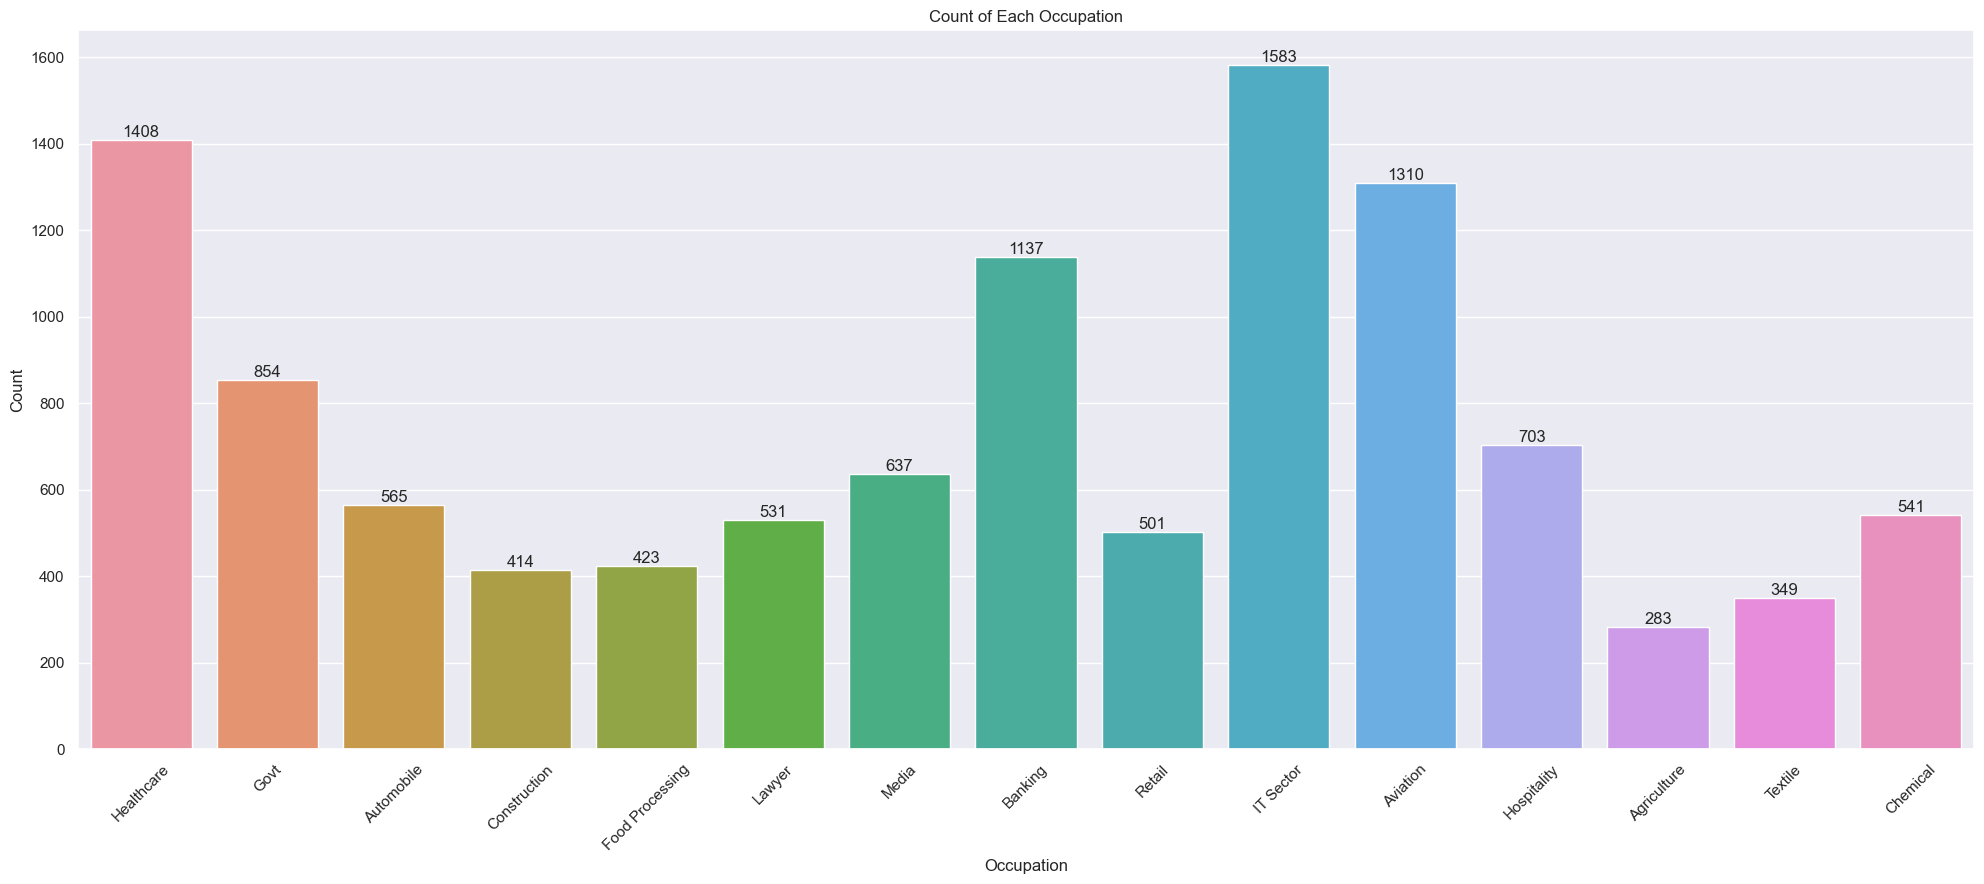

In [134]:
# Set the figure size for the plot
plt.figure(figsize=(20, 9))

# Create a countplot using Seaborn to visualize Occupation
ax = sns.countplot(data=df, x='Occupation')

# Add labels to the bars directly using bar_label method
ax.bar_label(ax.containers[0])

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Each Occupation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

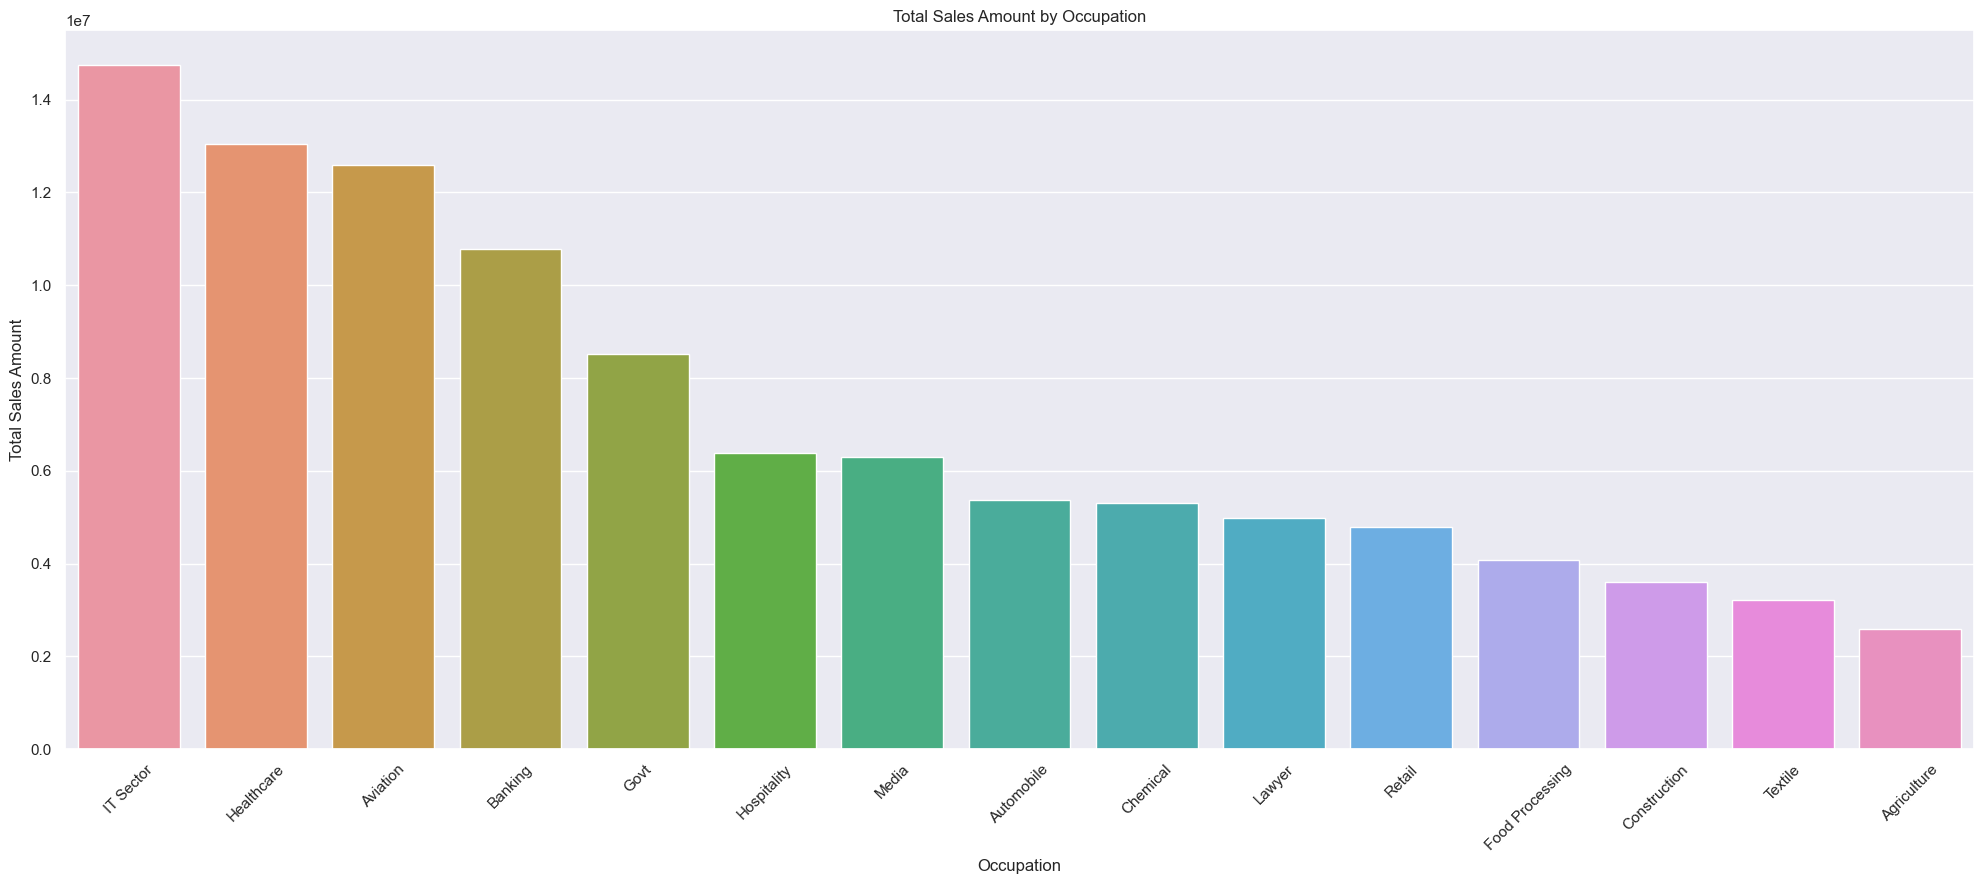

In [139]:
# Calculate total sales amount by Occupation
sales_state = df.groupby(['Occupation'])['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(20, 9))

# Create a bar plot using Seaborn to visualize total sales by Occupation
sns.barplot(data=sales_state, x='Occupation', y='Amount')

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Occupation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Based on the analysis of the graphs, we can draw the following conclusions:

- The majority of buyers are employed in the IT, Healthcare, and Aviation sectors.

These insights provide valuable information about the primary sectors of employment among our buyers within our dataset.


- ## Product Category

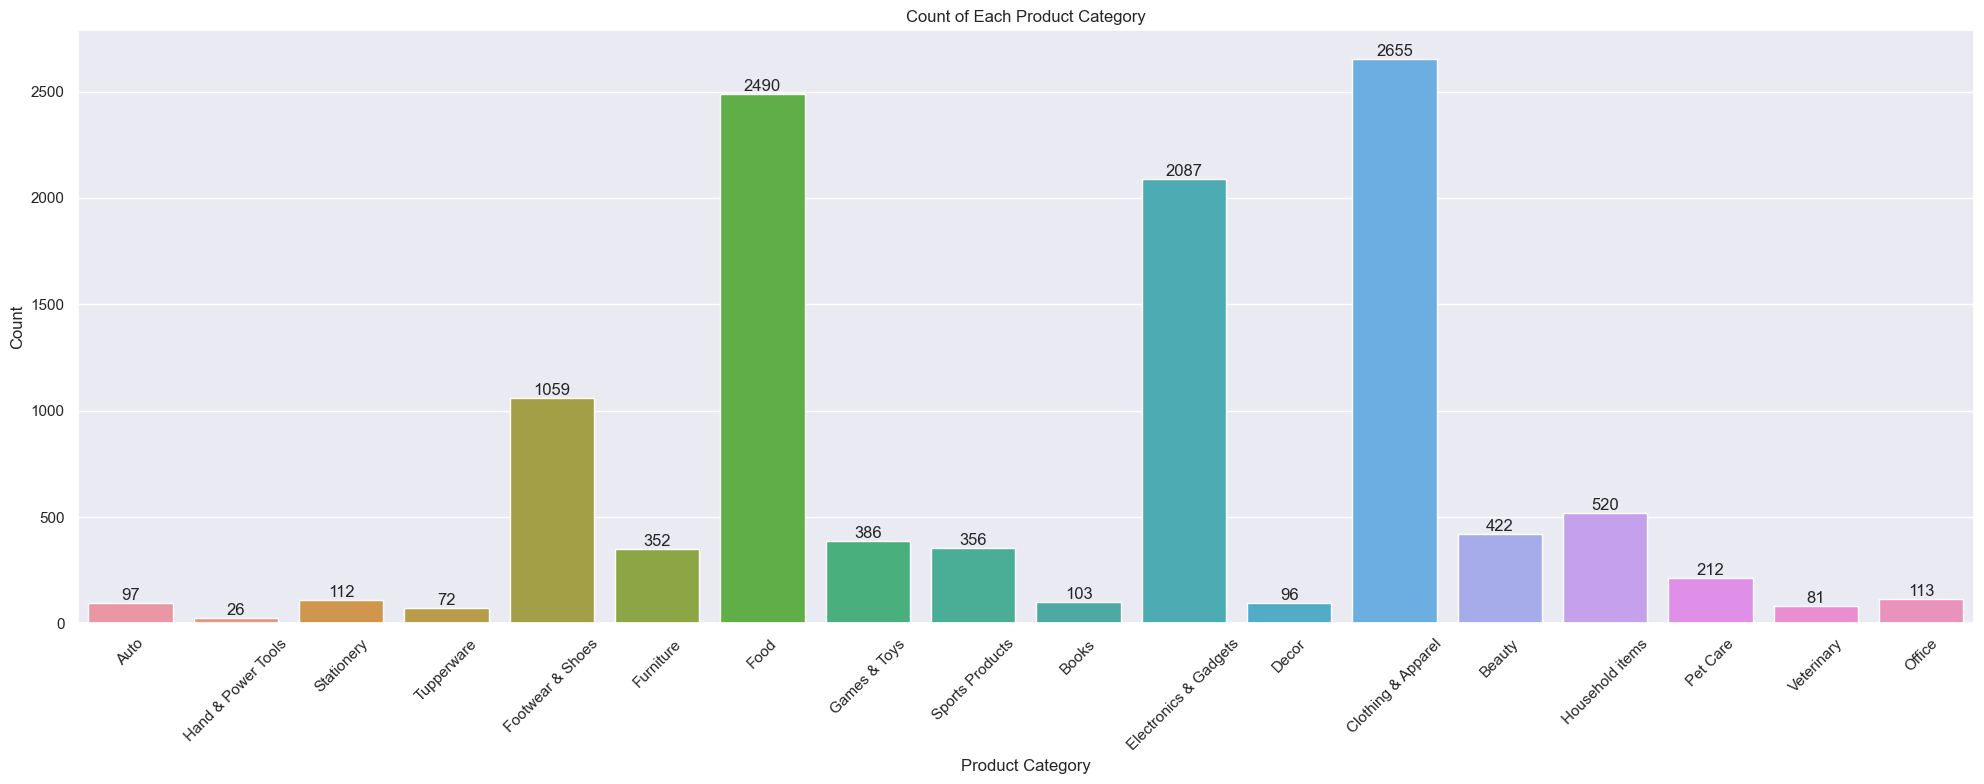

In [147]:
# Set the figure size for the plot
plt.figure(figsize=(20, 8))

# Create a countplot using Seaborn to visualize Product Categories
ax = sns.countplot(data=df, x='Product_Category')

# Add labels to the bars directly using bar_label method
ax.bar_label(ax.containers[0])

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Each Product Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

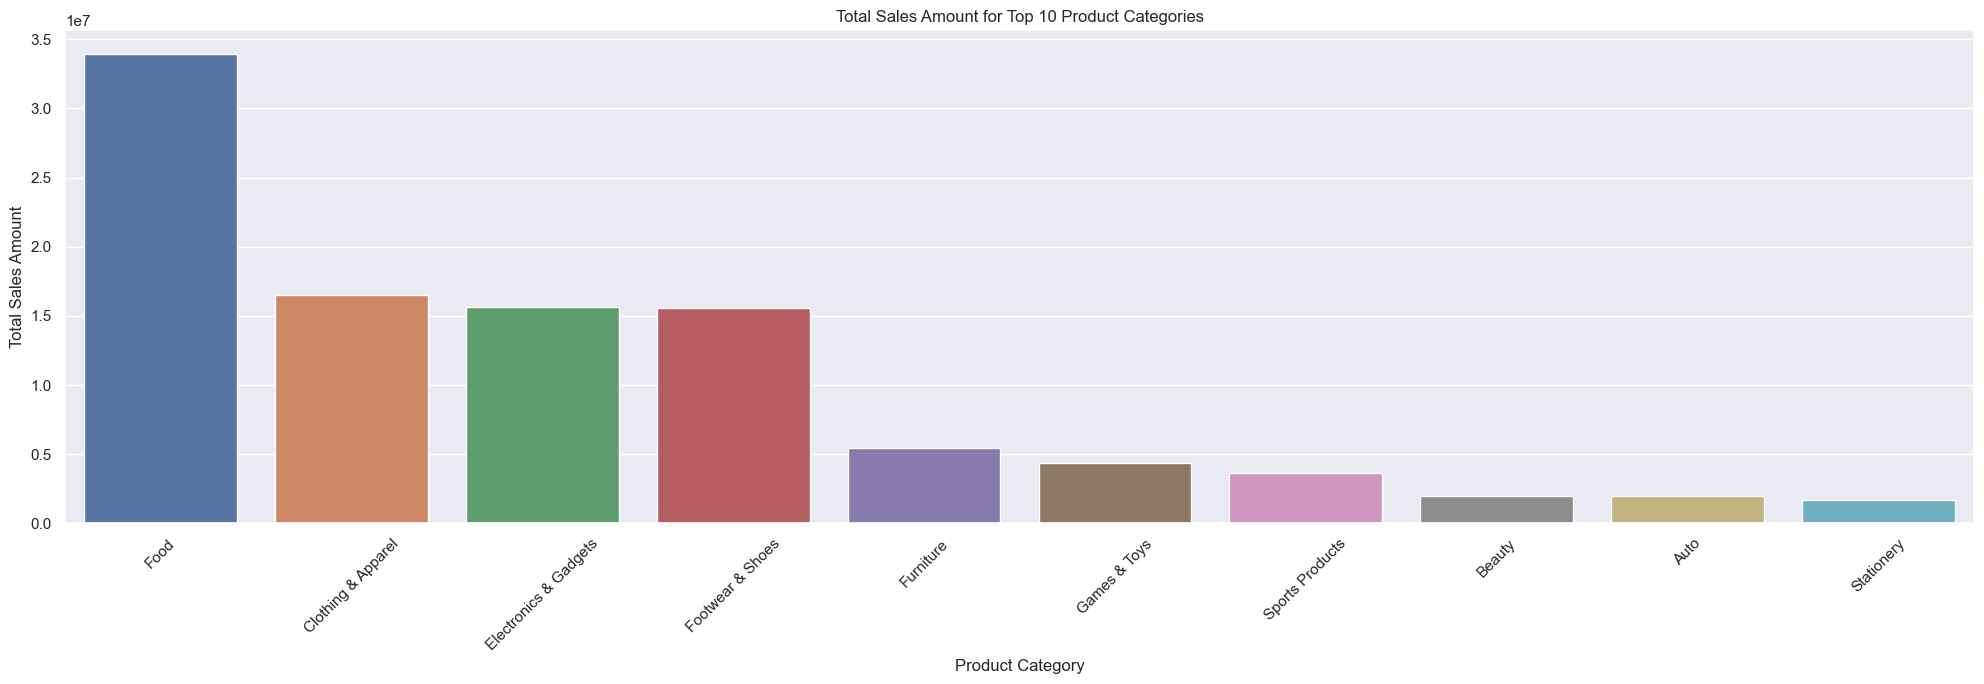

In [152]:
# Calculate total sales amount for top 10 Product Categories
sales_state = df.groupby(['Product_Category'])['Amount'].sum().nlargest(10).reset_index()

# Set the figure size for the plot
plt.figure(figsize=(20, 7))

# Create a bar plot using Seaborn to visualize total sales for top 10 Product Categories
sns.barplot(data=sales_state, x='Product_Category', y='Amount')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount for Top 10 Product Categories')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Based on the analysis of the graphs, we can make the following conclusions:

- The majority of sold products belong to the Food, Clothing, and Electronics categories.

These insights provide valuable information about the top-selling product categories within our dataset.


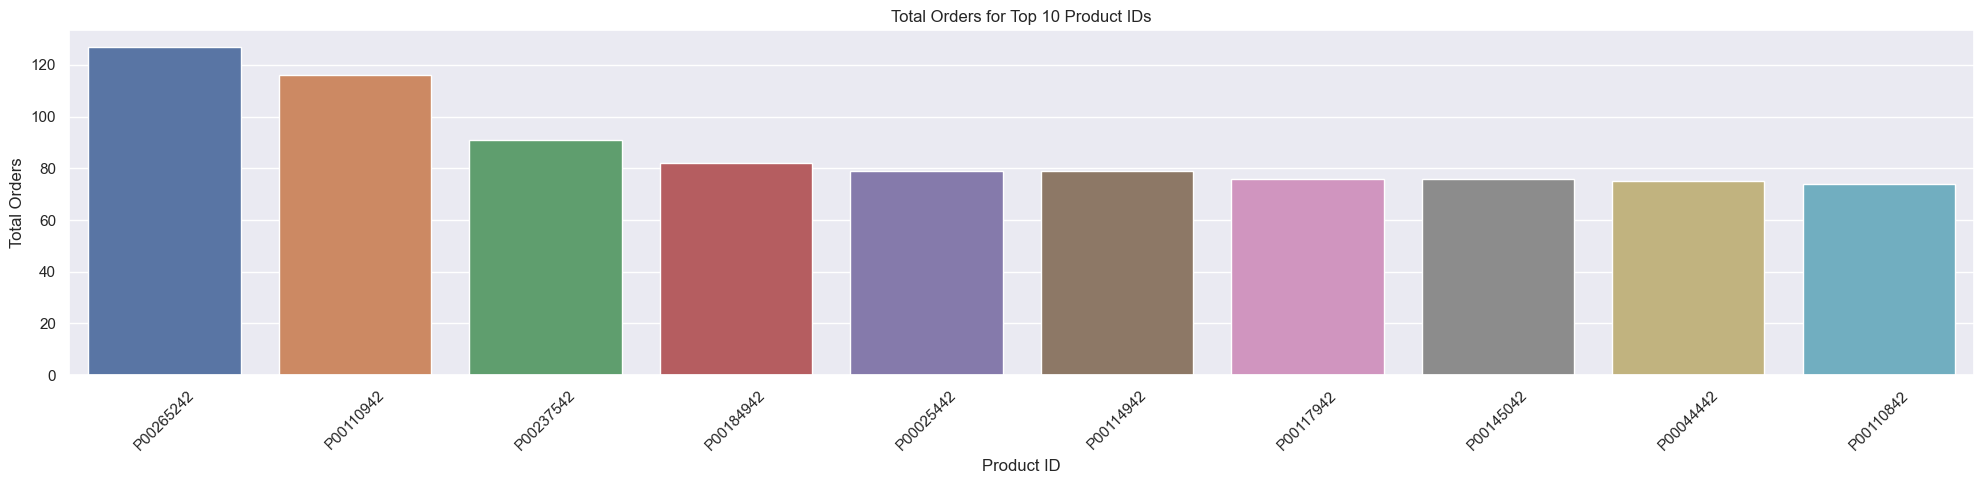

In [154]:
# Calculate total orders for top 10 Product IDs
sales_state = df.groupby(['Product_ID'])['Orders'].sum().nlargest(10).reset_index()

# Set the figure size for the plot
plt.figure(figsize=(20, 5))

# Create a bar plot using Seaborn to visualize total orders for top 10 Product IDs
sns.barplot(data=sales_state, x='Product_ID', y='Orders')

# Set labels and title
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.title('Total Orders for Top 10 Product IDs')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Conclusion

Based on our analysis, we can make the following conclusions:

- The primary group of buyers consists of married women aged between 26 and 35 years.
- These buyers are predominantly located in Uttar Pradesh, Maharashtra, and Karnataka.
- They are mostly employed in the IT, Healthcare, and Aviation sectors.
- Furthermore, they tend to purchase products from the Food, Clothing, and Electronics categories.

These findings provide valuable insights into the specific characteristics and preferences of our active buyers in our dataset.


#  ** Thank You**